![title](../../images/header.png)

Merging all CEO data (2015-2016-2022-2023)
-------
This notebook merges validated data from different CEO CAFI projects
CEO data must be merged and harmonized using the merge clean ceo data scripts
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set the display option to a large value to prevent text wrapping
pd.set_option('display.max_colwidth', None)

## Enter parameters

In [34]:
#identifier for country 
# COD COG CMR GAB EQG CAF
iso = 'COG'

In [35]:
# output file all CEO validated data file 
ceo_data_out =  '/home/sepal-user/module_results/esbae/COG/COG_all_ceo_2015_2016_2022_2023_clean.csv'

### 1. Read all CEO sample files

##### for 2015-2022 CEO sample data

In [36]:
ceo1522 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_all_ceo_2015_2016_2022_clean.csv')
print(ceo1522.columns.tolist())

['UID', 'ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_Change_Bin', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpen

In [37]:
# use QC outputs if desired
ceo2023 = pd.read_csv('/home/sepal-user/module_results/esbae/COG/COG_all_ceo_2023_clean_qc.csv')
print(ceo2023.columns.tolist())

['ID', 'ID.1', 'plotid', 'sampleid', 'sample_internal_id', 'lon', 'lat', 'collection_time', 'sample_geom', 'Ref_FNF_2022', 'Ref_NFtype_2022', 'Ref_Ftype_2022', 'Ref_FNF_2023', 'Ref_NFtype_2023', 'Ref_Ftype_2023', 'Ref_Change_2023', 'Ref_Change_Year', 'Ref_Change_Type_2023', 'Ref_Driver1_2023', 'Ref_Fire_2023', 'Ref_Change2_2023', 'Ref_Change2_Type_2023', 'Ref_Driver2_2023', 'Ref_Fire2_2023', 'Commentaires', 'collection', 'interpreted', 'Ref_Change_Bin', 'Ref_LCover_2022', 'Ref_Change_Year_2023', 'Ref_Change_LCover_2023', 'Def2023', 'Deg2023', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpenFor_Deg', 'Mangrove_Deg', 'Swam

### end of parameters

In [38]:
len(ceo1522)

6132

In [39]:
len(ceo2023)

3227

### merge all

In [40]:
#data_frames =[ceo1520, ceo1522, ceo2023]
data_frames =[ceo1522, ceo2023]

# Source file names corresponding to each data frame
#source_file = ['ceo_1520','ceo_1522', 'ceo_2023']  # Replace with your file names
source_file = ['ceo_1522', 'ceo_2023']  # Replace with your file names

# Merge data frames and add a new column for source file name
merged_ceo = pd.concat([df.assign(sampling=source_file) for df, source_file in zip(data_frames, source_file)], ignore_index=True)

In [41]:
merged_ceo.head()

,UID,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_Change_Bin,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,Ref_FNF_2016,Ref_NFtype_2016,Ref_Ftype_2016,Ref_Change_1622,Ref_Change_Type_1622,Ref_Year_1622,Ref_Driver1_1622,Ref_Fire_1622,Ref_Change2_1622,Ref_Change2_Type_1622,Ref_Driver2_1622,Ref_Fire2_1622,Other2,Ref_Regen_Year,Ref_FNF_2022,Ref_NFtype_2022,Ref_Ftype_2022,Commentaires,Ref_Driver_1622,Ref_LCover_2016,Ref_Change_Year_1622,Ref_Change_LCover_1622,ID.1,sample_internal_id,collection_time,Ref_FNF_2023,Ref_NFtype_2023,Ref_Ftype_2023,Ref_Change_2023,Ref_Change_Year,Ref_Change_Type_2023,Ref_Driver1_2023,Ref_Fire_2023,Ref_Change2_2023,Ref_Change2_Type_2023,Ref_Driver2_2023,Ref_Fire2_2023,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc
0,0.0,0,542426,542426.0,542426,11.279983,-3.903345,POINT(11.279983 -3.903345),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,0.0,0.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,COG,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,1016750,1016750.0,1016750,12.605415,-4.298105,POINT(12.605415 -4.298105),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,0.0,0.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,COG,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2,1016273,1016273.0,1016273,12.605014,-4.182788,POINT(12.605014 -4.182788),1.0,non,0.0,NF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,17.0,NaN,coll_1522_1,1,0.0,0.0,NF,NF_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COG,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3,1015146,1015146.0,1015146,12.568966,-3.865546,POINT(12.568966 -3.865546),1.0,oui,0.0,NF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,15.0,NaN,coll_1522_1,1,0.0,0.0,NF,NF_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COG,ceo_1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4,1006758,1006758.0,1006758,17.626291,2.904070,POINT(17.626291 2.90407),1.0,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,8.0,coll_1522_1,1,0.0,0.0,Stable,Stable_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0

In [42]:
# this might take some time
unique_check = merged_ceo['sample_geom'].nunique() == len(merged_ceo['sample_geom'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

All values are unique!


In [43]:
#if they are not unique...
#merged_ceo = merged_ceo.drop_duplicates(subset='sample_geom', keep='first', inplace=True)

In [44]:
len(merged_ceo)

9359

In [45]:
merged_ceo['collection'].value_counts(dropna=False)

collection
coll_1622_3    2906
coll_2023_2    1900
coll_1622_2    1815
coll_1622_1     999
QC_2023         969
coll_1522_1     412
coll_2023_1     358
Name: count, dtype: int64

In [46]:
print(merged_ceo.columns.tolist())

['UID', 'ID', 'plotid', 'point_id', 'sampleid', 'lon', 'lat', 'sample_geom', 'Ref_FNF_2015', 'Ref_Regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtAg', 'Ref_Year_1522', 'Ref_NFtype_2015', 'Ref_Ftype_2015', 'collection', 'interpreted', 'Ref_Change_Bin', 'Ref_LCover_2015', 'Ref_Change_Year_1522', 'Ref_Change_LCover_1522', 'Def2016', 'Def2017', 'Def2018', 'Def2019', 'Def2020', 'Def2021', 'Def2022', 'Deg2016', 'Deg2017', 'Deg2018', 'Deg2019', 'Deg2020', 'Deg2021', 'Deg2022', 'Defall', 'Degall', 'Stable', 'NF', 'DensFor', 'DensDryFor', 'SecFor', 'DryOpenFor', 'Mangrove', 'Swamp', 'Gallery', 'Plantation', 'Woodland', 'Shrubland', 'Grassland', 'Aquatic', 'Bare', 'Cultivated', 'Builtup', 'Water', 'DensFor_Def', 'DensDryFor_Def', 'SecFor_Def', 'DryOpenFor_Def', 'Mangrove_Def', 'Swamp_Def', 'Gallery_Def', 'Plantation_Def', 'Woodland_Def', 'DensFor_Deg', 'DensDryFor_Deg', 'SecFor_Deg', 'DryOpen

### 2. Combine and consolidate columns

In [47]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].fillna(merged_ceo['Ref_Ftype_2022']).astype(float).fillna(0).astype(int).astype(str)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
1     2381
3     1703
0     1482
13    1182
12    1032
8      403
9      380
16     260
18     160
14     110
4       97
15      96
17      40
10      29
7        4
Name: count, dtype: int64

In [48]:
#Ref_LCover will be blank where LCover is NF in 2022, because it could have been forest in 2015
# Create a new column by concatenating Ref_LCover, Ref_LCover_2015, and Ref_FType_2022
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2016'].fillna(merged_ceo['Ref_Ftype_2022']).astype(float).fillna(0).astype(int).astype(str)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
1     2381
3     1703
0     1482
13    1182
12    1032
8      403
9      380
16     260
18     160
14     110
4       97
15      96
17      40
10      29
7        4
Name: count, dtype: int64

In [49]:
merged_ceo.loc[merged_ceo['Ref_FNF_2015'] == 0, 'Ref_FNF_2015'] = merged_ceo['Ref_FNF_2016']
merged_ceo['Ref_LCover_2015']= merged_ceo['Ref_LCover_2015'].astype(int)
merged_ceo['Ref_LCover_2015'].value_counts(dropna=False)

Ref_LCover_2015
1     2381
3     1703
0     1482
13    1182
12    1032
8      403
9      380
16     260
18     160
14     110
4       97
15      96
17      40
10      29
7        4
Name: count, dtype: int64

In [50]:
# Create the new 'Ref_FNF' column
merged_ceo['Ref_LCover_2015'] = merged_ceo['Ref_LCover_2015'].astype(float)

condition = merged_ceo['Ref_LCover_2015'] < 12

# Apply the condition using numpy.where
merged_ceo['Ref_FNF_2015'] = np.where(condition, 1, 
                                             np.where(merged_ceo['Ref_LCover_2015'].notna(), 0, np.nan))
merged_ceo['Ref_FNF_2015'] = merged_ceo['Ref_FNF_2015'].astype(int)
merged_ceo['Ref_FNF_2015'].value_counts(dropna=False)

Ref_FNF_2015
1    6479
0    2880
Name: count, dtype: int64

In [51]:
merged_ceo['SecFor_Def'].value_counts(dropna=False)

SecFor_Def
0    9262
1      97
Name: count, dtype: int64

In [52]:
#merged_ceo['Ref_Change_Type_1523'] = merged_ceo['Ref_Change_Type_1520'].fillna(merged_ceo['Ref_Change_Type_1522']).fillna(merged_ceo['Ref_Change_Type_2023'])
merged_ceo['Ref_Change_Type_1522'] = merged_ceo['Ref_Change_Type_1522'].fillna(merged_ceo['Ref_Change_Type_1622'])

# Set rows where Ref_Change_Type_2023 is 'NF' to NaN
#merged_ceo.loc[merged_ceo['Ref_Change_Type_2023'] == 'NF', 'Ref_Change_Type'] = pd.NA

# Print the value counts
print(merged_ceo['Ref_Change_Type_1522'].value_counts(dropna=False))

Ref_Change_Type_1522
NaN       3227
NF        3023
Stable    2830
Deg        170
Def        109
Name: count, dtype: int64


In [53]:
#merged_ceo['Ref_Change_Year_1523'] = merged_ceo['Ref_Change_Year_1520'].fillna(merged_ceo['Ref_Change_Year_1522']).fillna(merged_ceo['Ref_Change_Year_2023'])
merged_ceo['Ref_Change_Year_1522'] = merged_ceo['Ref_Change_Year_1522'].fillna(merged_ceo['Ref_Change_Year_1622'])

merged_ceo['Ref_Change_Year_1522'].value_counts(dropna=False)

Ref_Change_Year_1522
NaN        3227
NF         3023
Stable     2945
Deg2019      28
Deg2018      27
Deg2022      24
Deg2021      23
Deg2020      22
Deg2017      22
Def2017       4
Def2020       3
Def2019       3
Def2021       2
Def2018       2
Def2016       2
Deg2016       1
Def2022       1
Name: count, dtype: int64

In [54]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Type_1522'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,coll_1522_1,coll_1622_1,coll_1622_2,coll_1622_3,Total
Ref_Change_Type_1522,,,,,
Def,9,10,39,51,109
Deg,2,30,56,82,170
NF,143,361,948,1571,3023
Stable,258,598,772,1202,2830
Total,412,999,1815,2906,6132


In [55]:
pd.pivot_table(merged_ceo,values='plotid',index=['Ref_Change_Type_2023'],columns=['collection'],aggfunc="count",margins=True,
                             margins_name='Total')

collection,QC_2023,coll_2023_1,coll_2023_2,Total
Ref_Change_Type_2023,,,,
Def,1.0,NaN,14.0,15
Deg,1.0,NaN,18.0,19
NF,310.0,103.0,657.0,1070
Stable,657.0,255.0,1211.0,2123
Total,969.0,358.0,1900.0,3227


In [56]:
merged_ceo['ISO'] = iso

In [57]:
merged_ceo['Ref_Change_Bin'] = 0  # Default value

merged_ceo.loc[
    (merged_ceo['Ref_Change_Type_1522'].isin(['Def', 'Deg'])) |
    (merged_ceo['Ref_Change_Type_2023'].isin(['Def', 'Deg'])),
    'Ref_Change_Bin'
] = 1
merged_ceo['Ref_Change_Bin'].value_counts(dropna=False)

Ref_Change_Bin
0    9046
1     313
Name: count, dtype: int64

In [60]:
merged_ceo['sampling'] = None  # Initialize column
merged_ceo.loc[merged_ceo['collection'].str.contains('1522|1622', na=False), 'sampling'] = '1522'
merged_ceo.loc[merged_ceo['collection'].str.contains('2023', na=False), 'sampling'] = '2023'
merged_ceo['sampling'].value_counts(dropna=False)

sampling
1522    6132
2023    3227
Name: count, dtype: int64

In [61]:
merged_ceo_column_names = merged_ceo.columns.tolist()
# Print the list of column names
merged_ceo_column_names

['UID',
 'ID',
 'plotid',
 'point_id',
 'sampleid',
 'lon',
 'lat',
 'sample_geom',
 'Ref_FNF_2015',
 'Ref_Regeneration',
 'Ref_Change_1522',
 'Ref_Change_Type_1522',
 'ArtFor',
 'ArtMine',
 'InfraR',
 'Urb',
 'IndFor',
 'Other',
 'Other_Desc',
 'IndMine',
 'IndAg',
 'ArtAg',
 'Ref_Year_1522',
 'Ref_NFtype_2015',
 'Ref_Ftype_2015',
 'collection',
 'interpreted',
 'Ref_Change_Bin',
 'Ref_LCover_2015',
 'Ref_Change_Year_1522',
 'Ref_Change_LCover_1522',
 'Def2016',
 'Def2017',
 'Def2018',
 'Def2019',
 'Def2020',
 'Def2021',
 'Def2022',
 'Deg2016',
 'Deg2017',
 'Deg2018',
 'Deg2019',
 'Deg2020',
 'Deg2021',
 'Deg2022',
 'Defall',
 'Degall',
 'Stable',
 'NF',
 'DensFor',
 'DensDryFor',
 'SecFor',
 'DryOpenFor',
 'Mangrove',
 'Swamp',
 'Gallery',
 'Plantation',
 'Woodland',
 'Shrubland',
 'Grassland',
 'Aquatic',
 'Bare',
 'Cultivated',
 'Builtup',
 'Water',
 'DensFor_Def',
 'DensDryFor_Def',
 'SecFor_Def',
 'DryOpenFor_Def',
 'Mangrove_Def',
 'Swamp_Def',
 'Gallery_Def',
 'Plantation_Def',

### 3. plot change points by year

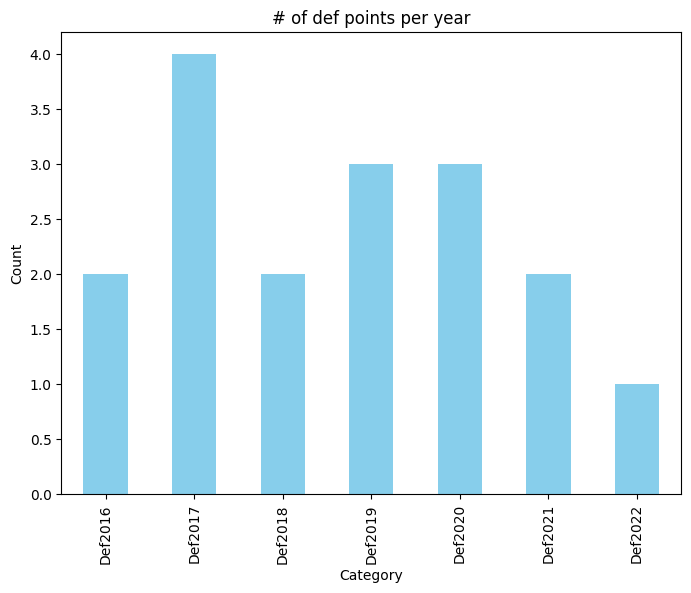

In [62]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022','Def2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

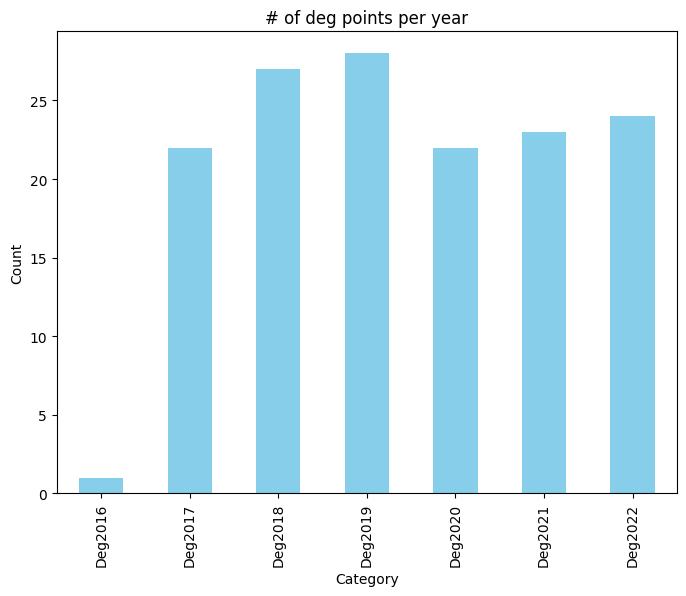

In [63]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022','Deg2023']

# Filter the DataFrame to include only the selected values
filtered_df = merged_ceo[merged_ceo['Ref_Change_Year_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_Change_Year_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [64]:
merged_ceo.head()

,UID,ID,plotid,point_id,sampleid,lon,lat,sample_geom,Ref_FNF_2015,Ref_Regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtAg,Ref_Year_1522,Ref_NFtype_2015,Ref_Ftype_2015,collection,interpreted,Ref_Change_Bin,Ref_LCover_2015,Ref_Change_Year_1522,Ref_Change_LCover_1522,Def2016,Def2017,Def2018,Def2019,Def2020,Def2021,Def2022,Deg2016,Deg2017,Deg2018,Deg2019,Deg2020,Deg2021,Deg2022,Defall,Degall,Stable,NF,DensFor,DensDryFor,SecFor,DryOpenFor,Mangrove,Swamp,Gallery,Plantation,Woodland,Shrubland,Grassland,Aquatic,Bare,Cultivated,Builtup,Water,DensFor_Def,DensDryFor_Def,SecFor_Def,DryOpenFor_Def,Mangrove_Def,Swamp_Def,Gallery_Def,Plantation_Def,Woodland_Def,DensFor_Deg,DensDryFor_Deg,SecFor_Deg,DryOpenFor_Deg,Mangrove_Deg,Swamp_Deg,Gallery_Deg,Plantation_Deg,Woodland_Deg,DensFor_Stable,DensDryFor_Stable,SecFor_Stable,DryOpenFor_Stable,Mangrove_Stable,Swamp_Stable,Gallery_Stable,Plantation_Stable,Woodland_Stable,ISO,sampling,Ref_FNF_2016,Ref_NFtype_2016,Ref_Ftype_2016,Ref_Change_1622,Ref_Change_Type_1622,Ref_Year_1622,Ref_Driver1_1622,Ref_Fire_1622,Ref_Change2_1622,Ref_Change2_Type_1622,Ref_Driver2_1622,Ref_Fire2_1622,Other2,Ref_Regen_Year,Ref_FNF_2022,Ref_NFtype_2022,Ref_Ftype_2022,Commentaires,Ref_Driver_1622,Ref_LCover_2016,Ref_Change_Year_1622,Ref_Change_LCover_1622,ID.1,sample_internal_id,collection_time,Ref_FNF_2023,Ref_NFtype_2023,Ref_Ftype_2023,Ref_Change_2023,Ref_Change_Year,Ref_Change_Type_2023,Ref_Driver1_2023,Ref_Fire_2023,Ref_Change2_2023,Ref_Change2_Type_2023,Ref_Driver2_2023,Ref_Fire2_2023,Ref_LCover_2022,Ref_Change_Year_2023,Ref_Change_LCover_2023,Def2023,Deg2023,interpreted_qc
0,0.0,0,542426,542426.0,542426,11.279983,-3.903345,POINT(11.279983 -3.903345),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,0,0.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,COG,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1,1016750,1016750.0,1016750,12.605415,-4.298105,POINT(12.605415 -4.298105),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0,coll_1522_1,1,0,0.0,Stable,Stable_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,COG,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2,1016273,1016273.0,1016273,12.605014,-4.182788,POINT(12.605014 -4.182788),1,non,0.0,NF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,17.0,NaN,coll_1522_1,1,0,0.0,NF,NF_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COG,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3,1015146,1015146.0,1015146,12.568966,-3.865546,POINT(12.568966 -3.865546),1,oui,0.0,NF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,15.0,NaN,coll_1522_1,1,0,0.0,NF,NF_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COG,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4,1006758,1006758.0,1006758,17.626291,2.904070,POINT(17.626291 2.90407),1,NaN,0.0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,8.0,coll_1522_1,1,0,0.0,Stable,Stable_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### 4. export ceo data to one csv file

In [65]:
merged_ceo.to_csv(ceo_data_out,index_label='UID')